# **Part - 1**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D, Dropout
from keras.utils import to_categorical, plot_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Big Data - Sem 6/Problem Statement 2 Health Care/1/Big Data - 50000.csv')

In [ ]:
data.head()

,P. ID,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,1,78,F,96,21.0,11.5,No,Yes,Yes,Yes,121,0.4,regular,No,URGENT
1,2,77,F,98,17.5,9.5,No,No,No,No,97,0.4,irregular,Yes,SICK
2,3,59,F,94,22.5,9.0,Yes,No,No,Yes,76,0.4,irregular,No,RISK
3,4,62,M,82,22.5,12.0,No,No,Yes,Yes,64,0.4,regular,No,NORMAL
4,5,78,M,86,11.5,10.5,Yes,Yes,Yes,Yes,106,0.2,irregular,No,SICK


In [ ]:
print(data.columns)

Index(['P. ID', 'Age ', 'Sex', 'Spo2', 'HBlood', 'LBlood', 'ChestPain',
       'SHBreath', 'Palip', 'Rest', 'Peaks', 'QRSwidth', 'P_P', 'STEl',
       'Triage'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
continuous_columns = ["Age ", 'Spo2', 'HBlood', 'LBlood', 'Peaks']
data[continuous_columns] = scaler.fit_transform(data[continuous_columns])

In [ ]:
data = data.drop('P. ID',axis=1)
data.head()

,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,0.884113,F,0.832953,0.923840,1.166992,No,Yes,Yes,Yes,0.886758,0.4,regular,No,URGENT
1,0.816065,F,1.147995,-0.087005,0.072155,No,No,No,No,-0.046726,0.4,irregular,Yes,SICK
2,-0.408806,F,0.517911,1.357059,-0.201554,Yes,No,No,Yes,-0.863523,0.4,irregular,No,RISK
3,-0.204661,M,-1.372343,1.357059,1.440701,No,No,Yes,Yes,-1.330265,0.4,regular,No,NORMAL
4,0.884113,M,-0.742258,-1.819882,0.619573,Yes,Yes,Yes,Yes,0.303331,0.2,irregular,No,SICK


In [ ]:
categorical_columns = ['Sex', 'ChestPain', 'SHBreath', 'Palip', 'Rest', 'QRSwidth', 'P_P', 'STEl']
encoder = LabelEncoder()

for column in categorical_columns:
    data[column] = encoder.fit_transform(data[column])

In [ ]:
data.head()

,Age,Sex,Spo2,HBlood,LBlood,ChestPain,SHBreath,Palip,Rest,Peaks,QRSwidth,P_P,STEl,Triage
0,0.884113,0,0.832953,0.923840,1.166992,0,1,1,1,0.886758,1,1,0,URGENT
1,0.816065,0,1.147995,-0.087005,0.072155,0,0,0,0,-0.046726,1,0,1,SICK
2,-0.408806,0,0.517911,1.357059,-0.201554,1,0,0,1,-0.863523,1,0,0,RISK
3,-0.204661,1,-1.372343,1.357059,1.440701,0,0,1,1,-1.330265,1,1,0,NORMAL
4,0.884113,1,-0.742258,-1.819882,0.619573,1,1,1,1,0.303331,0,0,0,SICK


In [ ]:
X = data.drop('Triage', axis=1).values
y = data['Triage'].values

In [ ]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=0)
Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(X_train,y_train, test_size=0.2, random_state=0)

In [ ]:
Xtrain = Xtrain.reshape(Xtrain.shape[0], Xtrain.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
Xvalid = Xvalid.reshape(Xvalid.shape[0], Xvalid.shape[1], 1)

In [ ]:
input_dims = Xtrain.shape[1]

In [ ]:
output_dims = y_onehot.shape[1]

# **Part - 2**

In [ ]:
model = Sequential()
model.add(Dense(128, input_shape=(input_dims,), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(output_dims, activation='softmax'))
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1792      
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 batch_normalization_13 (Bat  (None, 256)              1024      
 chNormalization)                                                
                                                                 
 dense_22 (Dense)            (None, 512)               131584    
                                                                 
 dropout_12 (Dropout)        (None, 512)              

In [ ]:
adam_opt = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
model.compile(optimizer=adam_opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(Xtrain, Ytrain, epochs=100, batch_size=32, validation_data=(Xvalid, Yvalid))

Epoch 1/100
1000/1000 [==============================] - 17s 16ms/step - loss: 1.0083 - accuracy: 0.5768 - val_loss: 0.6870 - val_accuracy: 0.7146
Epoch 2/100
1000/1000 [==============================] - 16s 16ms/step - loss: 0.7562 - accuracy: 0.6917 - val_loss: 0.5893 - val_accuracy: 0.7694
Epoch 3/100
1000/1000 [==============================] - 16s 16ms/step - loss: 0.5916 - accuracy: 0.7607 - val_loss: 0.4126 - val_accuracy: 0.8184
Epoch 4/100
1000/1000 [==============================] - 15s 15ms/step - loss: 0.4680 - accuracy: 0.8127 - val_loss: 0.2943 - val_accuracy: 0.8810
Epoch 5/100
1000/1000 [==============================] - 15s 15ms/step - loss: 0.4003 - accuracy: 0.8425 - val_loss: 0.2749 - val_accuracy: 0.8831
Epoch 6/100
1000/1000 [==============================] - 16s 16ms/step - loss: 0.3597 - accuracy: 0.8622 - val_loss: 0.2271 - val_accuracy: 0.9068
Epoch 7/100
1000/1000 [==============================] - 15s 15ms/step - loss: 0.3222 - accuracy: 0.8790 - val_loss: 0

# **Part - 3**

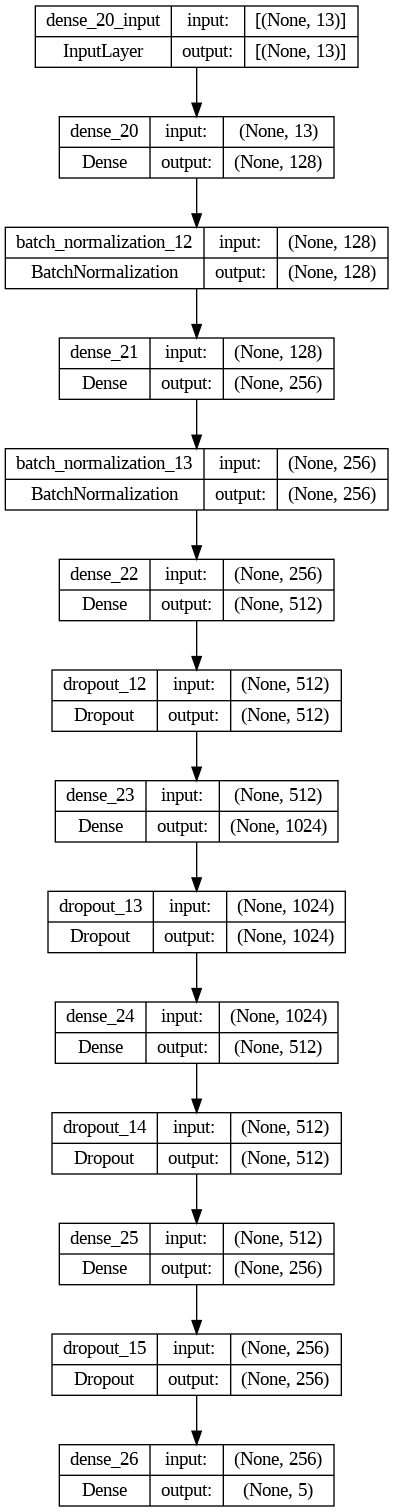

In [ ]:
# Plot the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# **Part - 4**

In [ ]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

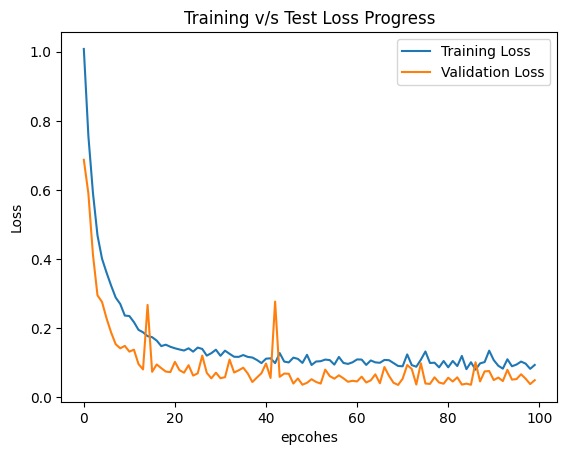

In [ ]:
plt.plot(hist.history['loss'],label='Training Loss')
plt.plot(hist.history['val_loss'],label='Validation Loss')
plt.xlabel("epcohes")
plt.ylabel("Loss")
plt.title("Training v/s Test Loss Progress")
plt.legend()

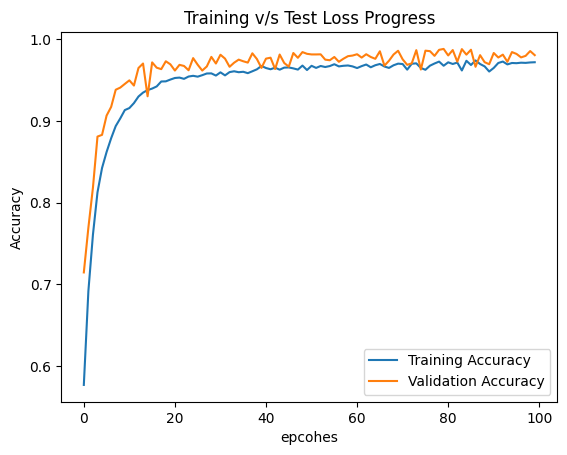

In [ ]:
plt.plot(hist.history['accuracy'],label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel("epcohes")
plt.ylabel("Accuracy")
plt.title("Training v/s Test Loss Progress")
plt.legend()

# **Part - 5**

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

Test Data

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 2s 4ms/step


In [ ]:
y_true = np.argmax(y_test, axis=1)

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred_classes, target_names=encoder.classes_))

              precision    recall  f1-score   support

  COLD STATE       1.00      1.00      1.00      1692
      NORMAL       0.99      0.99      0.99      2178
        RISK       0.99      0.97      0.98      2000
        SICK       0.95      0.99      0.97      2103
      URGENT       1.00      0.96      0.98      2027

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
# Print accuracy score
print("Accuracy:", accuracy_score(y_true, y_pred))

Accuracy: 0.9828


In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred.reshape(-1, output_dims), axis=1)

313/313 [==============================] - 1s 4ms/step


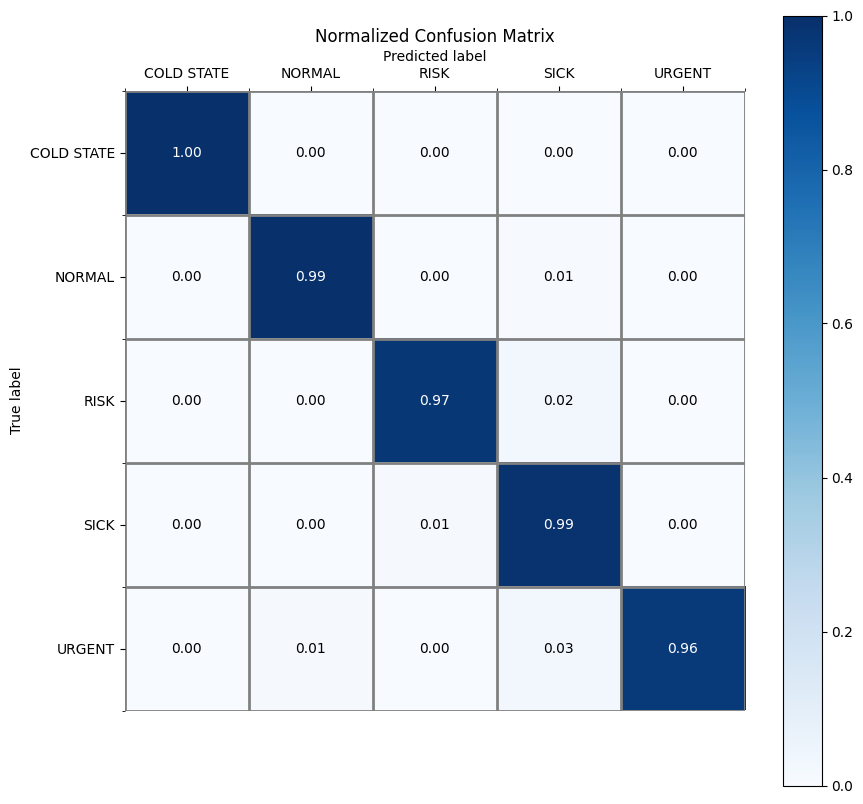

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the normalized confusion matrix
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=encoder.classes_, yticklabels=encoder.classes_,
       xlabel='Predicted label',
       ylabel='True label')

# Set axis ticks to appear in the center of each cell
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(cm.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(cm.shape[0] + 1) - 0.5, minor=True)
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

# Add value annotations to each cell
thresh = cm_normalized.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_normalized[i, j], '.2f'),
                ha='center', va='center',
                color='white' if cm_normalized[i, j] > thresh else 'black')

# Add title to the plot
ax.set_title('Normalized Confusion Matrix')

plt.show()


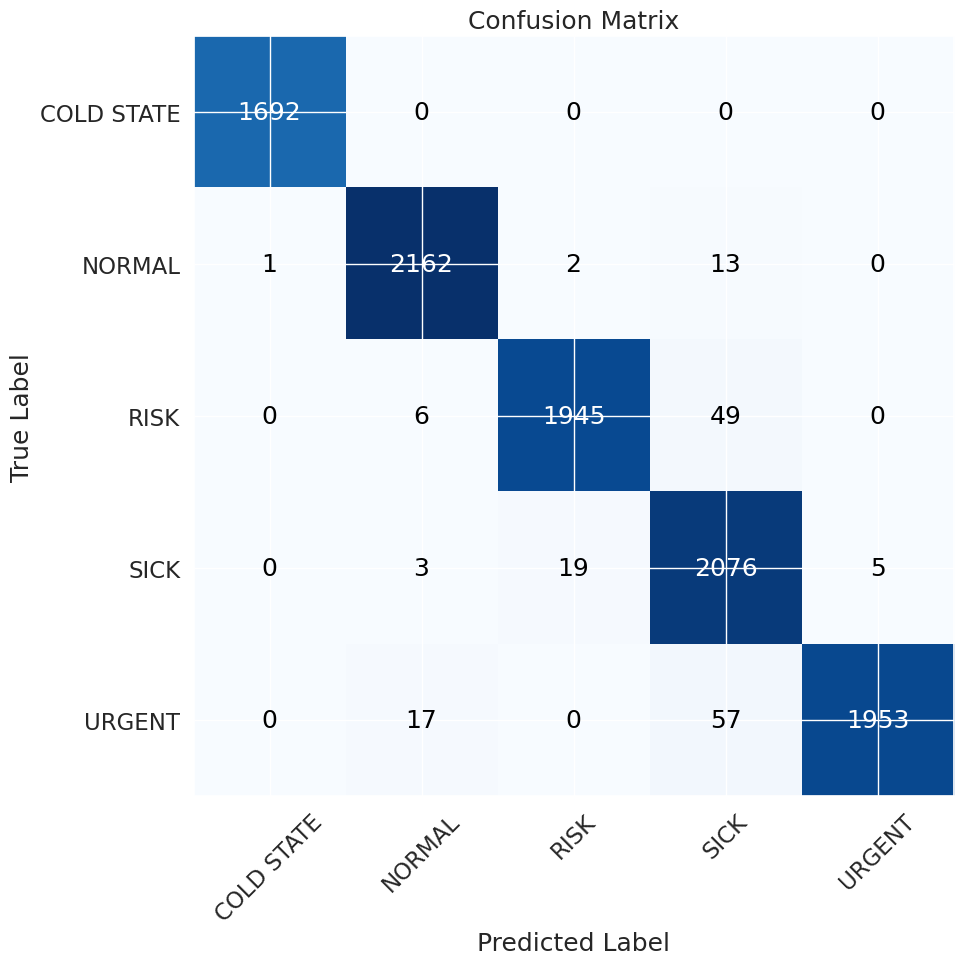

In [ ]:
# Convert predicted and true labels from one-hot encoding to integers
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add value annotations to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], '.0f'),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Add axis labels and a title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Add legend
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, encoder.classes_, rotation=45)
plt.yticks(tick_marks, encoder.classes_)
plt.tight_layout()

plt.show()

validation data

In [ ]:
y_pred_valid = np.argmax(model.predict(Xvalid), axis=-1)

250/250 [==============================] - 1s 4ms/step


In [ ]:
y_true = np.argmax(Yvalid, axis=1)

In [ ]:
# Print classification report
print(classification_report(y_true, y_pred_valid, target_names=encoder.classes_))

              precision    recall  f1-score   support

  COLD STATE       1.00      1.00      1.00      1379
      NORMAL       0.99      0.99      0.99      1663
        RISK       0.98      0.97      0.98      1631
        SICK       0.94      0.98      0.96      1650
      URGENT       1.00      0.96      0.98      1677

    accuracy                           0.98      8000
   macro avg       0.98      0.98      0.98      8000
weighted avg       0.98      0.98      0.98      8000



In [ ]:
# Print accuracy score
print("Accuracy:", accuracy_score(y_true, y_pred_valid))

Accuracy: 0.98075


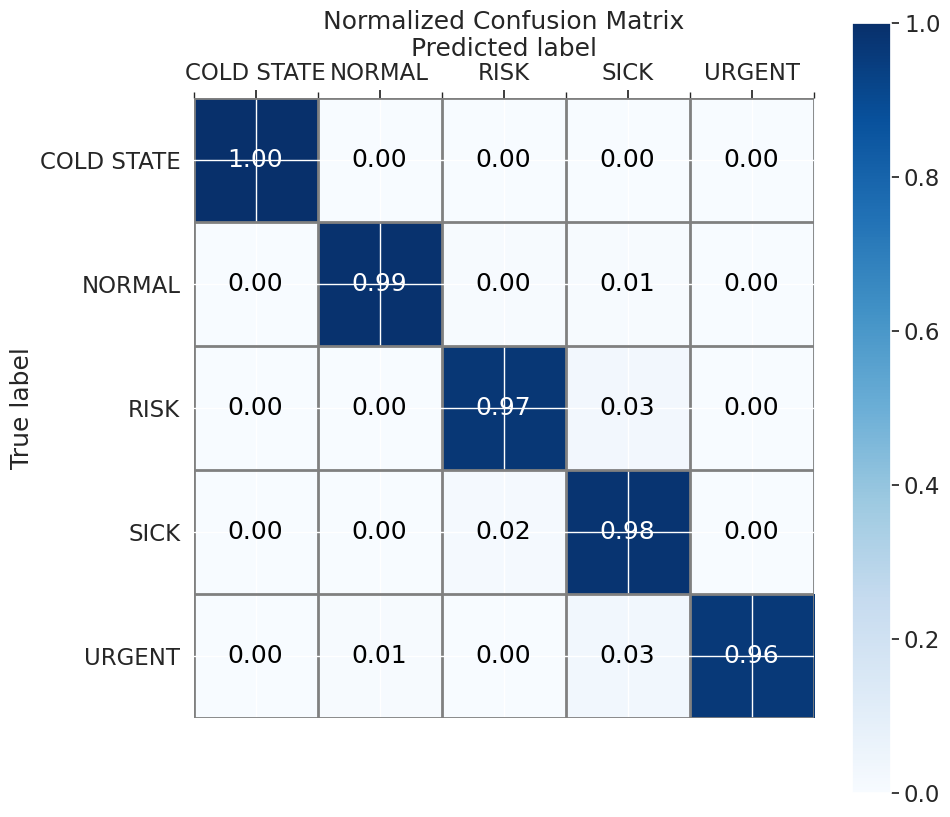

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_valid)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the normalized confusion matrix
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=encoder.classes_, yticklabels=encoder.classes_,
       xlabel='Predicted label',
       ylabel='True label')

# Set axis ticks to appear in the center of each cell
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(cm.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(cm.shape[0] + 1) - 0.5, minor=True)
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

# Add value annotations to each cell
thresh = cm_normalized.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_normalized[i, j], '.2f'),
                ha='center', va='center',
                color='white' if cm_normalized[i, j] > thresh else 'black')

# Add title to the plot
ax.set_title('Normalized Confusion Matrix')

plt.show()

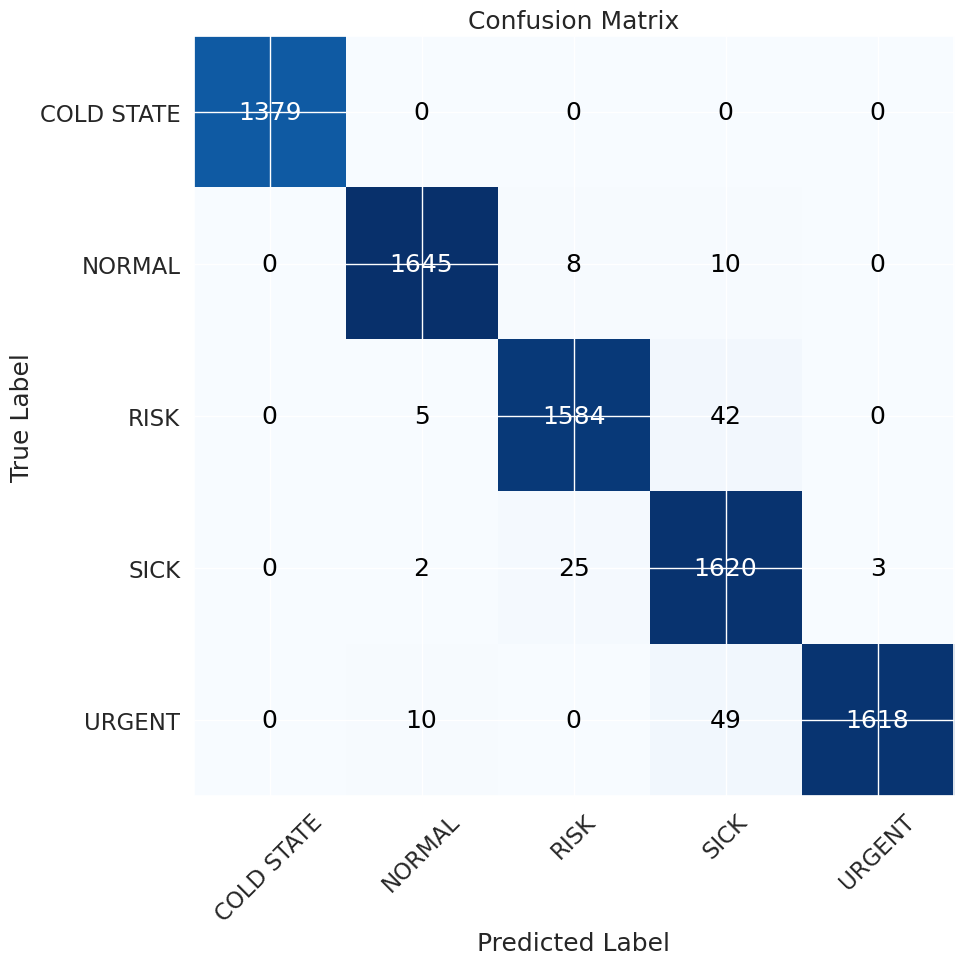

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_valid)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add value annotations to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], '.0f'),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Add axis labels and a title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Add legend
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, encoder.classes_, rotation=45)
plt.yticks(tick_marks, encoder.classes_)
plt.tight_layout()
plt.show()

Train Data

In [ ]:
y_pred_train = np.argmax(model.predict(Xtrain), axis=-1)

1000/1000 [==============================] - 4s 4ms/step


In [ ]:
y_true_t = np.argmax(Ytrain, axis=1)

In [ ]:
# Print classification report
print(classification_report(y_true_t, y_pred_train, target_names=encoder.classes_))

              precision    recall  f1-score   support

  COLD STATE       1.00      1.00      1.00      5529
      NORMAL       0.99      0.99      0.99      6763
        RISK       0.99      0.98      0.98      6476
        SICK       0.95      0.99      0.97      6566
      URGENT       1.00      0.97      0.98      6666

    accuracy                           0.99     32000
   macro avg       0.99      0.99      0.99     32000
weighted avg       0.99      0.99      0.99     32000



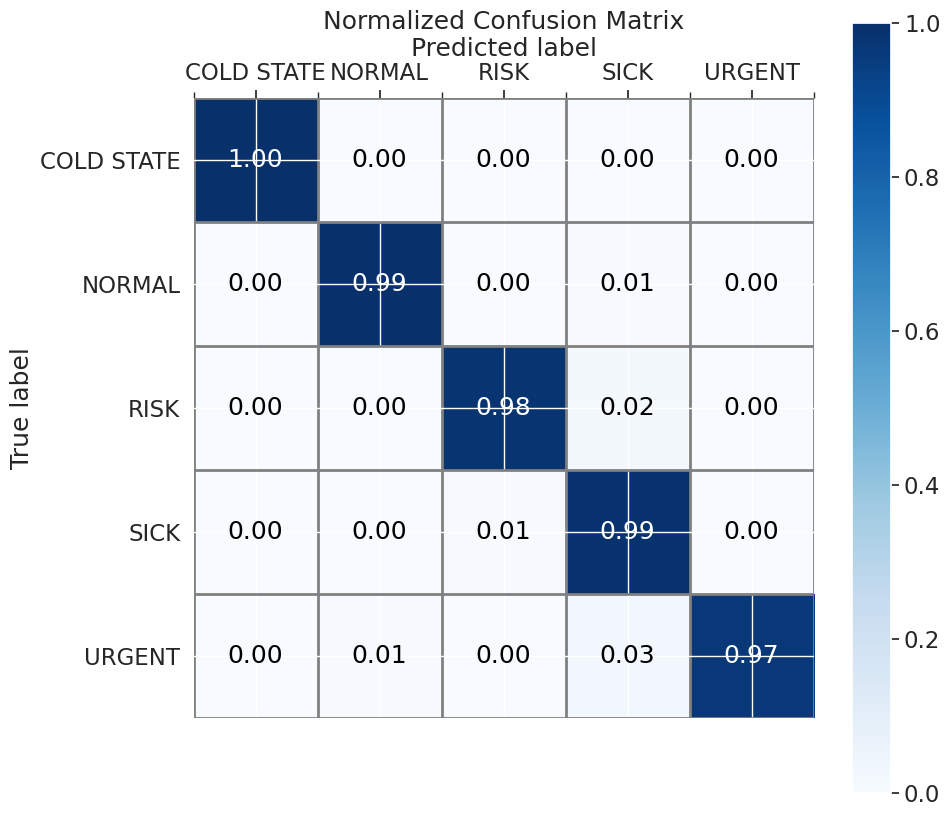

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_t, y_pred_train)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the normalized confusion matrix
im = ax.imshow(cm_normalized, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

# Set axis labels and tick marks
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=encoder.classes_, yticklabels=encoder.classes_,
       xlabel='Predicted label',
       ylabel='True label')

# Set axis ticks to appear in the center of each cell
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
for edge, spine in ax.spines.items():
    spine.set_visible(False)
ax.set_xticks(np.arange(cm.shape[1] + 1) - 0.5, minor=True)
ax.set_yticks(np.arange(cm.shape[0] + 1) - 0.5, minor=True)
ax.grid(which='minor', color='grey', linestyle='-', linewidth=2)

# Add value annotations to each cell
thresh = cm_normalized.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm_normalized[i, j], '.2f'),
                ha='center', va='center',
                color='white' if cm_normalized[i, j] > thresh else 'black')

# Add title to the plot
ax.set_title('Normalized Confusion Matrix')

plt.show()

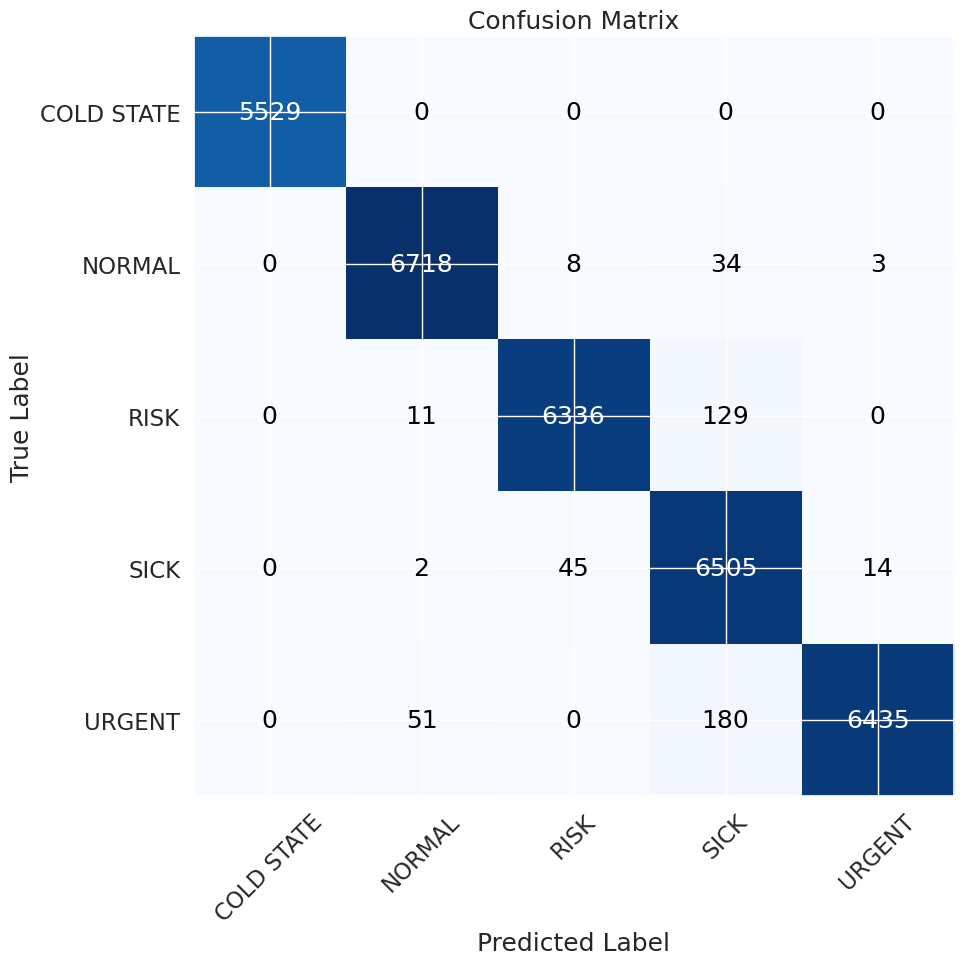

In [ ]:
# Compute the confusion matrix
cm = confusion_matrix(y_true_t, y_pred_train)

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the confusion matrix
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Add value annotations to each cell
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], '.0f'),
                ha='center', va='center',
                color='white' if cm[i, j] > thresh else 'black')

# Add axis labels and a title
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

# Add legend
tick_marks = np.arange(len(encoder.classes_))
plt.xticks(tick_marks, encoder.classes_, rotation=45)
plt.yticks(tick_marks, encoder.classes_)
plt.tight_layout()
plt.show()

# **Part - 6**

In [ ]:
!pip install lime

In [ ]:
from lime import lime_tabular

In [ ]:
explainer = lime_tabular.LimeTabularExplainer(
    X_train,
    feature_names=data.drop('Triage', axis=1).columns,
    class_names=encoder.classes_,
    categorical_features=[data.columns.get_loc(col) for col in categorical_columns],
    categorical_names={i: data[col].unique() for i, col in enumerate(categorical_columns)},
    discretize_continuous=True
)

In [ ]:
def predict_proba(x):
    x = x.reshape(-1, X_test.shape[1], 1)
    return model.predict(x)

In [ ]:
instance_index = 0
instance = X_test[instance_index].flatten()
exp = explainer.explain_instance(instance, predict_proba, num_features=len(data.columns) - 1)

157/157 [==============================] - 1s 7ms/step


In [ ]:
exp.show_in_notebook(show_table=True)

In [ ]:
instance_index = 5000
instance = X_test[instance_index].flatten()
exp_5k = explainer.explain_instance(instance, predict_proba, num_features=len(data.columns) - 1)

157/157 [==============================] - 1s 4ms/step


In [ ]:
exp_5k.show_in_notebook(show_table=True)